# Import Basic Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Load the dataset into dataframe

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Exploratory Data Analysis

In [5]:
data.shape

(768, 9)

In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

# Data Visualization

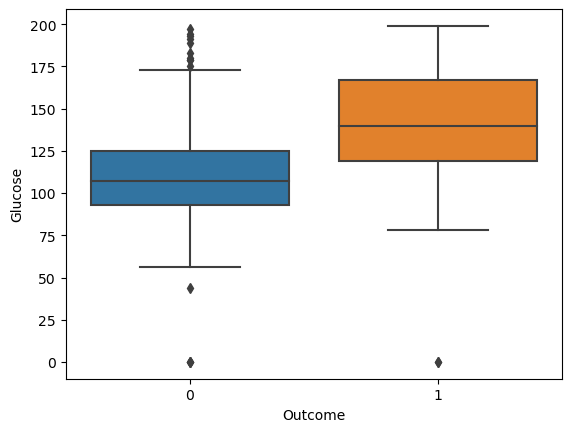

In [11]:
sns.boxplot(x='Outcome', y='Glucose', data=data)
plt.show()


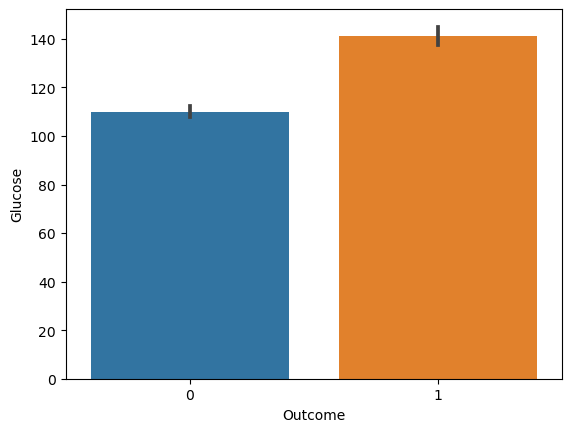

In [12]:
sns.barplot(x='Outcome', y='Glucose', data=data)
plt.show()

<Axes: >

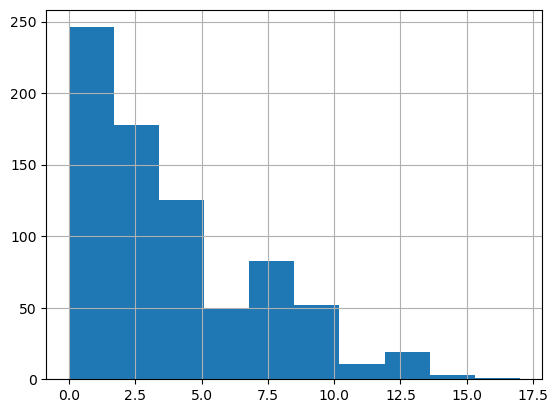

In [13]:
data.Pregnancies.hist()

<Axes: >

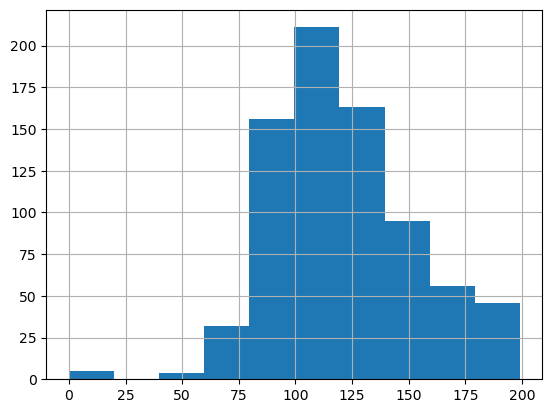

In [14]:
data.Glucose.hist()

In [15]:
X = data.drop("Outcome", axis =1) 
y = data["Outcome"]

# Split and scale the data

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled and X_test_scaled contain the scaled features


# Build and Train the model 

### Random forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train_scaled, y_train)

pred_rfc = RFC.predict(X_test_scaled)
RFC_Accuracy= accuracy_score(y_test, pred_rfc)
RFC_Accuracy = round(RFC_Accuracy*100, 2)

print("Accuracy score for RandomForestClassifier is: ", RFC_Accuracy)
print(classification_report(y_test, pred_rfc))

Accuracy score for RandomForestClassifier is:  74.48
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       125
           1       0.64      0.61      0.63        67

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192



### Decission Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)

pred_dt = DT.predict(X_test_scaled)
DT_Accuracy= accuracy_score(y_test, pred_dt)
DT_Accuracy = round(DT_Accuracy *100, 2)
print("Accuracy score for Decission tree classifier is: ", DT_Accuracy )
print(classification_report(y_test, pred_dt))

Accuracy score for Decission tree classifier is:  70.83
              precision    recall  f1-score   support

           0       0.82      0.70      0.76       125
           1       0.56      0.72      0.63        67

    accuracy                           0.71       192
   macro avg       0.69      0.71      0.70       192
weighted avg       0.73      0.71      0.71       192



####  XGBoost classifier

In [23]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train_scaled, y_train)

pred_xgb = XGB.predict(X_test_scaled)

XGB_Accuracy = accuracy_score(y_test, pred_xgb)
XGB_Accuracy = round(XGB_Accuracy * 100, 2)
print("Accuracy score for XGBoost classifier is:", XGB_Accuracy)

print(classification_report(y_test, pred_xgb))


Accuracy score for XGBoost classifier is: 71.88
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       125
           1       0.59      0.61      0.60        67

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.72      0.72      0.72       192



### KNeighborsClassifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy and print the results
knn_accuracy = accuracy_score(y_test, pred_knn)
knn_accuracy = round(knn_accuracy * 100, 2)
print("Accuracy score for k-Nearest Neighbors classifier is:", knn_accuracy)

# Print classification report
print(classification_report(y_test, pred_knn))


Accuracy score for k-Nearest Neighbors classifier is: 71.35
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       125
           1       0.60      0.54      0.57        67

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.68       192
weighted avg       0.71      0.71      0.71       192



In [25]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=0)
logreg.fit(X_train_scaled, y_train)


pred_logreg = logreg.predict(X_test_scaled)


logreg_accuracy = accuracy_score(y_test, pred_logreg)
logreg_accuracy = round(logreg_accuracy * 100, 2)
print("Accuracy score for Logistic Regression is:", logreg_accuracy)

# Print classification report
print(classification_report(y_test, pred_logreg))


Accuracy score for Logistic Regression is: 78.12
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       125
           1       0.73      0.60      0.66        67

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.78       192



# Summary of Algorithm's Accuracy 

In [26]:
data = {'Algorithm': ['Random Forest Classifier','Decision Tree Classifier','XGBoost Classifier', 'KNeighborsClassifier', 'Logistic Regression'],
        'Accuracy': [RFC_Accuracy, DT_Accuracy, XGB_Accuracy, knn_accuracy, logreg_accuracy]}

summary = pd.DataFrame(data)

summary.head()

,Algorithm,Accuracy
0,Random Forest Classifier,74.48
1,Decision Tree Classifier,70.83
2,XGBoost Classifier,71.88
3,KNeighborsClassifier,71.35
4,Logistic Regression,78.12


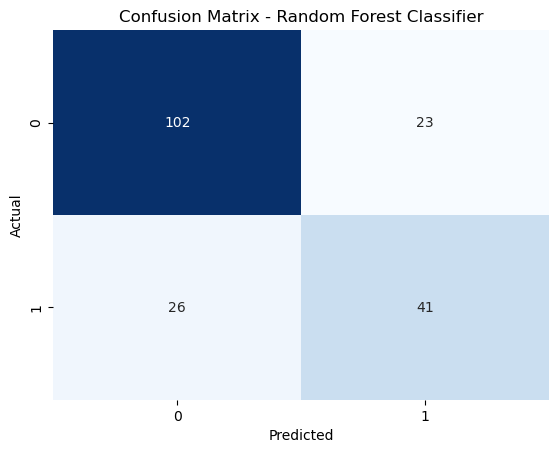

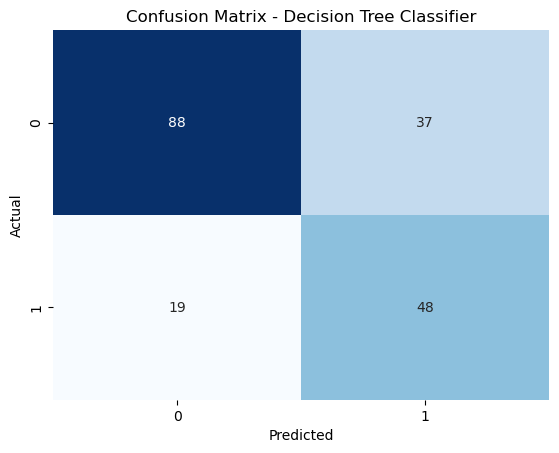

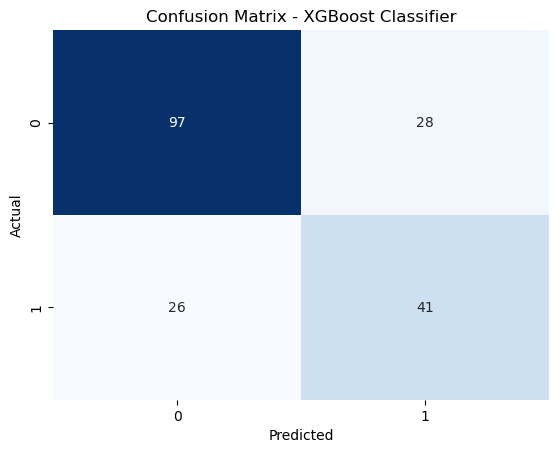

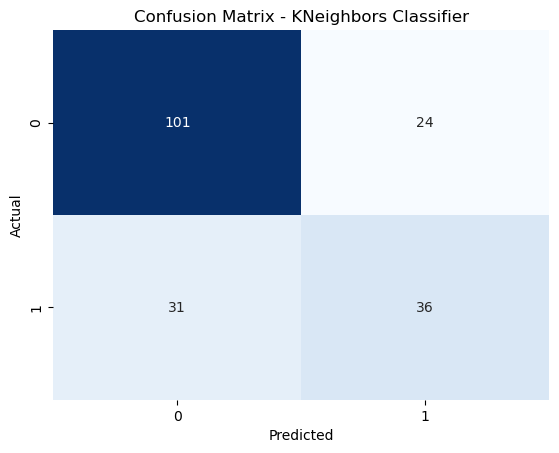

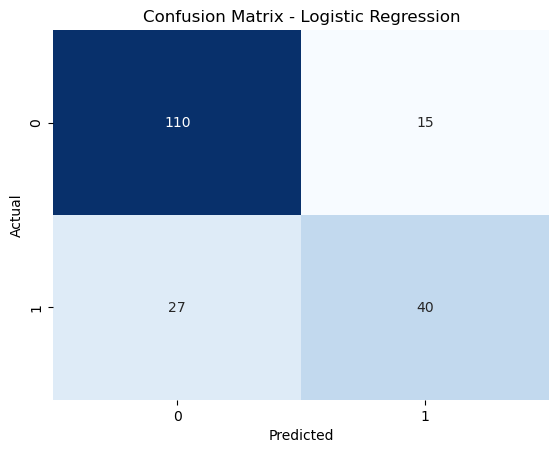

In [27]:
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Confusion Matrix for Random Forest Classifier
cm_rfc = confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(cm_rfc, 'Confusion Matrix - Random Forest Classifier')

cm_dt = confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(cm_dt, 'Confusion Matrix - Decision Tree Classifier')

# Confusion Matrix for XGBoost Classifier
cm_xgb = confusion_matrix(y_test, pred_xgb)
plot_confusion_matrix(cm_xgb, 'Confusion Matrix - XGBoost Classifier')

# Confusion Matrix for KNeighbors Classifier
cm_knn = confusion_matrix(y_test, pred_knn)
plot_confusion_matrix(cm_knn, 'Confusion Matrix - KNeighbors Classifier')

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, pred_logreg)
plot_confusion_matrix(cm_logreg, 'Confusion Matrix - Logistic Regression')


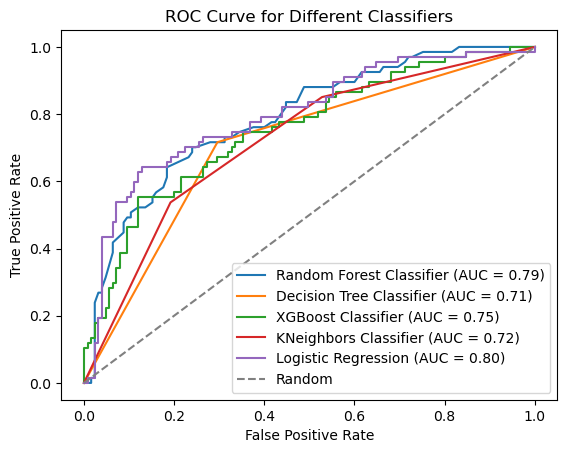

In [29]:
from sklearn.metrics import roc_curve, auc

pred_proba_rfc = RFC.predict_proba(X_test_scaled)
pred_proba_dt = DT.predict_proba(X_test_scaled)
pred_proba_xgb = XGB.predict_proba(X_test_scaled)
pred_proba_knn = knn.predict_proba(X_test_scaled)
pred_proba_logreg = logreg.predict_proba(X_test_scaled)


def plot_roc_curve(fpr, tpr, label, auc_score):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, pred_proba_rfc[:, 1])
auc_rfc = auc(fpr_rfc, tpr_rfc)
plot_roc_curve(fpr_rfc, tpr_rfc, 'Random Forest Classifier', auc_rfc)
fpr_dt, tpr_dt, _ = roc_curve(y_test, pred_proba_dt[:, 1])
auc_dt = auc(fpr_dt, tpr_dt)
plot_roc_curve(fpr_dt, tpr_dt, 'Decision Tree Classifier', auc_dt)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, pred_proba_xgb[:, 1])
auc_xgb = auc(fpr_xgb, tpr_xgb)
plot_roc_curve(fpr_xgb, tpr_xgb, 'XGBoost Classifier', auc_xgb)

fpr_knn, tpr_knn, _ = roc_curve(y_test, pred_proba_knn[:, 1])
auc_knn = auc(fpr_knn, tpr_knn)
plot_roc_curve(fpr_knn, tpr_knn, 'KNeighbors Classifier', auc_knn)

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, pred_proba_logreg[:, 1])
auc_logreg = auc(fpr_logreg, tpr_logreg)
plot_roc_curve(fpr_logreg, tpr_logreg, 'Logistic Regression', auc_logreg)


plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classifiers')
plt.legend()
plt.show()
